<a href="https://colab.research.google.com/github/deep-ll/sound_event_detection_localiztion_under_university-of-surrey/blob/main/all__aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#authentication
from google.colab import auth
auth.authenticate_user()

#accessing cloud data
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

!mkdir colab_direcoty
!gcsfuse --implicit-dirs aug-1 colab_direcoty


In [ ]:
#cuda compatibility
#%cd /content/colab_direcoty/seld-dcase2020-master
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1
#!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
#!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
#!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
#!apt-get update
#!apt-get install cuda
#for gpu testing

#import tensorflow
#tensorflow.test.gpu_device_name()/

#!nvidia-smi


In [ ]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!cat /content/local/lib/python3.6/dist-packages/external/local_config_cuda/cuda/cuda/cuda_config.h
!grep TF_CUDA_VERSION

In [ ]:
!nvcc --version


In [ ]:
!sudo apt install libcudnn7=7.5.1.10-1+cuda10.0


In [ ]:
!sudo apt install libcudnn7=7.6.5.32-1+cuda10.2
!sudo apt install libcudnn7-dev=7.6.5.32-1+cuda10.2


In [ ]:
!sudo apt-cache policy libcudnn7-dev


In [ ]:
!sudo apt-get --purge remove cuda-11.2


In [ ]:
!dpkg -l | grep -i cudnn

In [ ]:
!grep CUDNN_MAJOR -A 2

In [ ]:
!nvidia-smi


In [ ]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install cuda=8.0.61-1
!apt autoremove

In [ ]:

#required libraries
#!pip3 install sox
!pip install audiomentations==0.20.0
!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.14.0
!pip install q keras==2.3.1
!pip install h5py==2.10.0
#!pip install torch-audiomentations
#!pip install nlpaug
#!pip install audiomentations
!pip install librosa --upgrade
#!pip install librosa==0.8.1
#!pip install pydub==0.25.1
#!pip install -r/content/colab_direcoty/requirements.txt

In [ ]:
#required imports
import math
from IPython.display import Audio
import matplotlib.pyplot as plt
#from torchaudio.utils import download_asset
import torch
import torchaudio
import torchaudio.functional as F
from scipy.io.wavfile import read
from matplotlib import pyplot
import numpy as np
import scipy.io.wavfile as wav
import librosa.display
import IPython.display


**wave plotting**


[[   0    0    0    0]
 [   0   -1    0    0]
 [   4   -1    1    0]
 ...
 [ 175 -123  255  -94]
 [ 171 -118  256  -90]
 [ 172 -113  255  -92]]


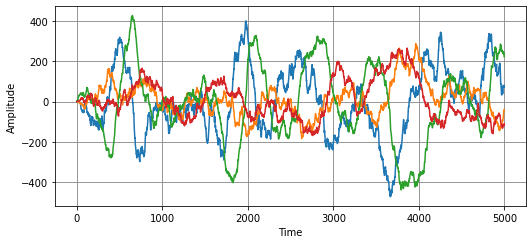

In [ ]:


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
#input_data = wav.read("/content/colab_direcoty/foa_dev/fold1_room1_mix001_ov1.wav")
input_data1=wav.read("/content/fold1_room1_mix001_ov1.wav")
#fs, audio = wav.read(audio_path)

#audio = input_data[1]
audio2=input_data1[1]
print(audio2)
#audio2=audio2[:5000]
#audio1 = input_data[0]
#print(audio1)
#plt.figure(figsize=[15,14])
#pyplot.xscale('log')
#plt.plot(np.linspace(0, 1, len(audio[0:24000])), audio[0:24000])
#plt.plot(np.linspace(0, 1, len(audio2[0:24000])), audio2[0:24000])
#plt.plot(audio[0:24000])
#plt.grid(c='grey')

plt.plot(audio2[0:5000])
plt.grid(c='grey')

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()
#fig, axs = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
#axs[0].plot(audio[0:24000])
#plt.grid(c='grey')

#axs[1].plot(audio2[0:24000])
#plt.grid(c='grey')
#plt.savefig('f1.png')



<h4>zipping files and transfer</h4>

In [ ]:
!zip -r /content/sample_data/foa_dev_mix.zip /content/sample_data/foa_dev_mix #zipping files
!cp -r "/content/sample_data/foa_dev_mix.zip" "/content/colab_direcoty/seld-dcase2020-master/c"
#copying files from one folder to other

**<h3>TORCH PLOT</h3>**

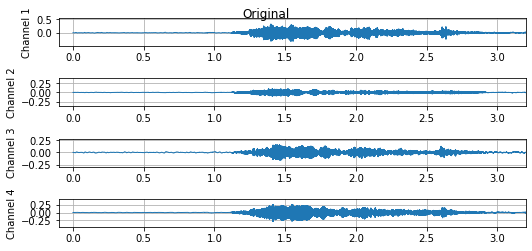

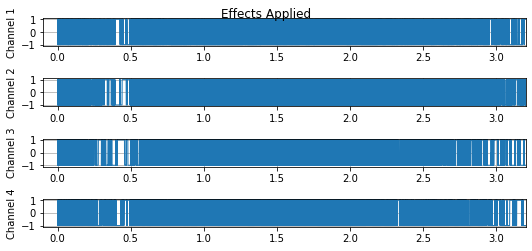

<Figure size 540x252 with 0 Axes>

In [ ]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)
waveform1, sample_rate1 = torchaudio.load("/content/sample_data/fold1_room1_mix001_ov1.wav")
waveform2, sample_rate2 = torchaudio.load("/content/colab_direcoty/foa_dev/fold1_room1_mix001_ov1.wav")

plot_waveform(waveform1, sample_rate1, title="Original", xlim=(-0.1, 3.2))
plot_waveform(waveform2, sample_rate2, title="Effects Applied", xlim=(-0.1, 3.2))
plt.savefig('f2.png')



<h4> audio display</h4>

In [ ]:
Audio(waveform1, rate=sample_rate1)
metadata = torchaudio.info("/content/colab_direcoty/foa_dev/fold1_room1_mix001_ov1.wav")
print(metadata)
IPython.display.Audio(data="/content/sample_data/q7.wav", rate=24000)

<H4>** AUGMENTATION**</H4>

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import scipy.io.wavfile as wav
import librosa
#import tensorflow as tf
import soundfile as sf
import numpy
import os
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25,p=0.5),
    PitchShift(min_semitones=-1, max_semitones=1,p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])
pathAudio="/content/colab_direcoty/foa_dev"
files = librosa.util.find_files(pathAudio, ext=['wav'])
files = numpy.asarray(files)
for y1 in files:
    metadata=torchaudio.info(y1)
    print(metadata)
    k1=os.path.basename(y1)
    m1,n1= os.path.splitext(k1)
    print(m1)
    i1,i2=librosa.load(y1,mono=False,sr=24000)#for time stretch and pitch shift
    print(i1.shape[1])
    s3=np.reshape(i1, (4, 1440000))
    print(s3.shape[1])
    augmented_samples = augment(samples=s3, sample_rate=24000)
    print(augmented_samples.shape[1])
    aug1=np.reshape(augmented_samples, (1440000,4))
    print(aug1.shape[1])
    %cd /content/sample_data/foa_dev_mix/
    sf.write(f"{m1}.wav",aug1,24000)
#s0 = "/content/colab_direcoty/foa_dev"
#i1,i2=librosa.load(s0,mono=False,sr=24000)#for time stretch and pitch shift
#print(i1,i2)
#print(i1.shape)
#s1,s2=wav.read(s0)
#print(s1)
#print(s2)
#print(s2.shape)
print(s2.shape[1])
s3=np.reshape(s2, (4, 1440000))
#print(s3.shape[0])
print(s3.shape[1])
#print(s3)

# Augment/transform/perturb the audio data



In [ ]:
%cd /content/colab_direcoty/seld-dcase2020-master
!python calculate_dev_results_from_dcase_output.py

/content/colab_direcoty/seld-dcase2020-master
SET: 1
USING DEFAULT PARAMETERS

	quick_test: False
	dataset_dir: /content/colab_direcoty
	feat_label_dir: /content/colab_direcoty/feat_label/
	model_dir: models/
	dcase_output: True
	dcase_dir: results/
	mode: eval
	dataset: foa
	fs: 24000
	hop_len_s: 0.02
	label_hop_len_s: 0.1
	max_audio_len_s: 60
	nb_mel_bins: 64
	label_sequence_length: 60
	batch_size: 128
	dropout_rate: 0
	nb_cnn2d_filt: 64
	f_pool_size: [4, 4, 2]
	rnn_size: [128, 128]
	fnn_size: [128]
	loss_weights: [1.0, 1000.0]
	nb_epochs: 50
	epochs_per_fit: 5
	doa_objective: masked_mse
	lad_doa_thresh: 20
	feature_sequence_length: 300
	t_pool_size: [5, 1, 1]
	patience: 50
	unique_classes: {'alarm': 0, 'baby': 1, 'crash': 2, 'dog': 3, 'engine': 4, 'female_scream': 5, 'female_speech': 6, 'fire': 7, 'footsteps': 8, 'knock': 9, 'male_scream': 10, 'male_speech': 11, 'phone': 12, 'piano': 13}
Number of predicted files: 100
Number of reference files: 601

Calculating ['all', 'ov', 'ir'] s

In [ ]:
#!pip install nlpaug
!pip install audiomentations

In [ ]:
!python visualize_SELD_output.py

SET: 1
USING DEFAULT PARAMETERS

	quick_test: False
	dataset_dir: /content/colab_direcoty
	feat_label_dir: /content/colab_direcoty/feat_label/
	model_dir: models/
	dcase_output: True
	dcase_dir: results/
	mode: eval
	dataset: foa
	fs: 24000
	hop_len_s: 0.02
	label_hop_len_s: 0.1
	max_audio_len_s: 60
	nb_mel_bins: 64
	label_sequence_length: 60
	batch_size: 128
	dropout_rate: 0
	nb_cnn2d_filt: 64
	f_pool_size: [4, 4, 2]
	rnn_size: [128, 128]
	fnn_size: [128]
	loss_weights: [1.0, 1000.0]
	nb_epochs: 50
	epochs_per_fit: 5
	doa_objective: masked_mse
	lad_doa_thresh: 20
	feature_sequence_length: 300
	t_pool_size: [5, 1, 1]
	patience: 50
	unique_classes: {'alarm': 0, 'baby': 1, 'crash': 2, 'dog': 3, 'engine': 4, 'female_scream': 5, 'female_speech': 6, 'fire': 7, 'footsteps': 8, 'knock': 9, 'male_scream': 10, 'male_speech': 11, 'phone': 12, 'piano': 13}
[[ 317  -53  -38 -227]
 [ 313  -54  -39 -229]
 [ 312  -58  -38 -234]
 ...
 [  -1  -46  188 -165]
 [ -13  -48  180 -160]
 [  -4  -50  181 -159]

In [ ]:
! jupyter nbconvert --to html /content/sample_data/guass_and_shift.ipynb

[NbConvertApp] Converting notebook /content/sample_data/guass_and_shift.ipynb to html
[NbConvertApp] Writing 716797 bytes to /content/sample_data/guass_and_shift.html


In [ ]:
!python batch_feature_extraction.py

Streaming output truncated to the last 5000 lines.
 [  151  -143   897    -2]]
427: fold5_room1_mix028_ov2.wav, (3000, 448)
[[-32768  32767  32767  32767]
 [-32768  32767  32767  32767]
 [-32768  32767  32767  32767]
 ...
 [ 32767 -32768  32767 -32768]
 [ 32767 -32768  32767 -32768]
 [ 32767 -32768  32767 -32768]]
428: fold5_room1_mix029_ov2.wav, (3000, 448)
[[-1734   163   -46 -2728]
 [-1909    41   171 -2616]
 [-1867  -185   364 -2337]
 ...
 [    0  -180    36   -72]
 [   13  -213    27   -17]
 [   22  -234   -28  -131]]
429: fold5_room1_mix030_ov2.wav, (3000, 448)
[[ 590  292   56 -499]
 [ 598  290   80 -550]
 [ 593  286   74 -597]
 ...
 [-134 -168  216  354]
 [-104 -166  230  319]
 [ -59 -160  245  309]]
430: fold5_room1_mix031_ov2.wav, (3000, 448)
[[-32768 -32768 -32768 -32768]
 [-32768 -32768 -32768 -32768]
 [-32768 -32768 -32768 -32768]
 ...
 [ 32767  32767  32767  32767]
 [ 32767  32767  32767 -32768]
 [ 32767  32767  32767 -32768]]
431: fold5_room1_mix032_ov2.wav, (3000, 448)


In [ ]:
!python seld.py

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
!python seld.py 5

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
%cd /content/colab_direcoty/seld-dcase2020-master

/content/colab_direcoty/seld-dcase2020-master


In [ ]:
!python batch_feature_extraction.py#dev

python3: can't open file 'batch_feature_extraction.py#dev': [Errno 2] No such file or directory


In [ ]:
!python batch_feature_extraction.py#eval

In [ ]:
%cd /content/colab_direcoty/seld-dcase2020-master

/content/colab_direcoty/seld-dcase2020-master


In [ ]:
!python seld.py

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
import tensorflow as tf

tf.compat.v1.Session()

In [ ]:
!pip install tensorflow==1.14.0


In [ ]:
!tensorflow_version

/bin/bash: tensorflow_version: command not found


In [ ]:
!pip install tensorflow-gpu==1.14.0
!pip install q keras==2.3.1

In [ ]:
#!apt-get update;
!wget https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64 -O cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-0-local/7fa2af80.pub
#!apt-get update
!apt-get -y install gcc-7 g++-7
!apt-get -y install cuda

!export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda/lib64\${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}

In [ ]:
!python seld.py

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
%cd /content/colab_direcoty/seld-dcase2020-master

/content/colab_direcoty/seld-dcase2020-master


In [ ]:
!python seld.py #eval,spec aug

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
!python calculate_dev_results_from_dcase_output.py

SET: 1
USING DEFAULT PARAMETERS

	quick_test: False
	dataset_dir: /content/colab_direcoty
	feat_label_dir: /content/colab_direcoty/feat_label/
	model_dir: models/
	dcase_output: True
	dcase_dir: results/
	mode: eval
	dataset: foa
	fs: 24000
	hop_len_s: 0.02
	label_hop_len_s: 0.1
	max_audio_len_s: 60
	nb_mel_bins: 64
	label_sequence_length: 60
	batch_size: 128
	dropout_rate: 0
	nb_cnn2d_filt: 64
	f_pool_size: [4, 4, 2]
	rnn_size: [128, 128]
	fnn_size: [128]
	loss_weights: [1.0, 1000.0]
	nb_epochs: 50
	epochs_per_fit: 5
	doa_objective: masked_mse
	lad_doa_thresh: 20
	feature_sequence_length: 300
	t_pool_size: [5, 1, 1]
	patience: 50
	unique_classes: {'alarm': 0, 'baby': 1, 'crash': 2, 'dog': 3, 'engine': 4, 'female_scream': 5, 'female_speech': 6, 'fire': 7, 'footsteps': 8, 'knock': 9, 'male_scream': 10, 'male_speech': 11, 'phone': 12, 'piano': 13}
Number of predicted files: 100
Number of reference files: 601

Calculating ['all', 'ov', 'ir'] scores for 1_foa_dev


------------------------

In [ ]:
!python calculate_dev_results_from_dcase_output.py

SET: 1
USING DEFAULT PARAMETERS

	quick_test: False
	dataset_dir: /content/colab_direcoty
	feat_label_dir: /content/colab_direcoty/feat_label/
	model_dir: models/
	dcase_output: True
	dcase_dir: results/
	mode: eval
	dataset: foa
	fs: 24000
	hop_len_s: 0.02
	label_hop_len_s: 0.1
	max_audio_len_s: 60
	nb_mel_bins: 64
	label_sequence_length: 60
	batch_size: 128
	dropout_rate: 0
	nb_cnn2d_filt: 64
	f_pool_size: [4, 4, 2]
	rnn_size: [128, 128]
	fnn_size: [128]
	loss_weights: [1.0, 1000.0]
	nb_epochs: 50
	epochs_per_fit: 5
	doa_objective: masked_mse
	lad_doa_thresh: 20
	feature_sequence_length: 300
	t_pool_size: [5, 1, 1]
	patience: 50
	unique_classes: {'alarm': 0, 'baby': 1, 'crash': 2, 'dog': 3, 'engine': 4, 'female_scream': 5, 'female_speech': 6, 'fire': 7, 'footsteps': 8, 'knock': 9, 'male_scream': 10, 'male_speech': 11, 'phone': 12, 'piano': 13}
Number of predicted files: 200
Number of reference files: 200

Calculating ['all', 'ov', 'ir'] scores for 1_foa_eval


-----------------------

In [ ]:
!python visualize_SELD_output.py

SET: 1
USING DEFAULT PARAMETERS

	quick_test: False
	dataset_dir: /content/colab_direcoty
	feat_label_dir: /content/colab_direcoty/feat_label/
	model_dir: models/
	dcase_output: True
	dcase_dir: results/
	mode: eval
	dataset: foa
	fs: 24000
	hop_len_s: 0.02
	label_hop_len_s: 0.1
	max_audio_len_s: 60
	nb_mel_bins: 64
	label_sequence_length: 60
	batch_size: 128
	dropout_rate: 0
	nb_cnn2d_filt: 64
	f_pool_size: [4, 4, 2]
	rnn_size: [128, 128]
	fnn_size: [128]
	loss_weights: [1.0, 1000.0]
	nb_epochs: 50
	epochs_per_fit: 5
	doa_objective: masked_mse
	lad_doa_thresh: 20
	feature_sequence_length: 300
	t_pool_size: [5, 1, 1]
	patience: 50
	unique_classes: {'alarm': 0, 'baby': 1, 'crash': 2, 'dog': 3, 'engine': 4, 'female_scream': 5, 'female_speech': 6, 'fire': 7, 'footsteps': 8, 'knock': 9, 'male_scream': 10, 'male_speech': 11, 'phone': 12, 'piano': 13}
[[ 317  -53  -38 -227]
 [ 313  -54  -39 -229]
 [ 312  -58  -38 -234]
 ...
 [  -1  -46  188 -165]
 [ -13  -48  180 -160]
 [  -4  -50  181 -159]